In [264]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

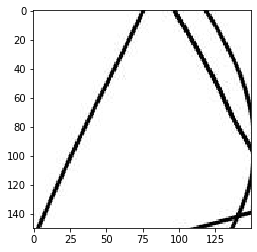

In [265]:
img = cv2.imread('tests/001.jpg', 0)
img = img[200:350, 200:350]

rows = img.shape[0]
cols = img.shape[1]

minPixel = np.amin(img)
maxPixel = np.amax(img)

plt.imshow(img, cmap='gray')
plt.show()

In [266]:
# MinMax Scaler
img = (img - minPixel) / (maxPixel - minPixel)

In [267]:
visited = np.array([[False for i in range (cols)] for j in range (rows)])
print(visited.shape)

(150, 150)


In [268]:
def dfs(img, visited, lines, i, j, threshold):
    visited[i][j] = True
    for horizontal in [-1, 0, 1]:
        for vertical in [-1, 0, 1]:
            if ((horizontal or vertical) and (i + horizontal >= 0 and i + horizontal < rows) and (j + vertical >= 0 and j + vertical < cols) and img[i + horizontal][j + vertical] <= threshold and not visited[i + horizontal][j + vertical]):
                lines.append([(j, rows - i),(j + vertical, rows - (i + horizontal))])
                dfs(img, visited, lines, i + horizontal, j + vertical, threshold)

In [269]:
threshold = 0.05
lines = []
for i in range (rows):
    for j in range (cols):
        if (not visited[i][j] and img[i][j] <= threshold):
            dfs(img, visited, lines, i, j, threshold)
        visited[i][j] = True

In [270]:
output = ""
output += "[asy]\n"
for line in lines:
    output += "draw(" + str(line[0]) + "--" + str(line[1]) + ");\n"
output += "[/asy]"

In [271]:
f = open("asymptote.txt", "w")
f.write(output)
f.close()